<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import dataset</a></span></li><li><span><a href="#Model-Development" data-toc-modified-id="Model-Development-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Development</a></span><ul class="toc-item"><li><span><a href="#Model-1---FIx-learning-rate-&amp;-estimators" data-toc-modified-id="Model-1---FIx-learning-rate-&amp;-estimators-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model 1 - FIx learning rate &amp; estimators</a></span></li><li><span><a href="#Iteration-1:-Tune-max_depth-and-min_child_weight" data-toc-modified-id="Iteration-1:-Tune-max_depth-and-min_child_weight-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Iteration 1: Tune max_depth and min_child_weight</a></span></li><li><span><a href="#Iteration-2-:-Tune-max_depth-and-min_child_weight" data-toc-modified-id="Iteration-2-:-Tune-max_depth-and-min_child_weight-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Iteration 2 : Tune max_depth and min_child_weight</a></span></li><li><span><a href="#Iteration-3-:-Tune-gamma" data-toc-modified-id="Iteration-3-:-Tune-gamma-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Iteration 3 : Tune gamma</a></span></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model 2</a></span></li><li><span><a href="#Iteration-4-:-Tune-subsample-and-colsample_bytree" data-toc-modified-id="Iteration-4-:-Tune-subsample-and-colsample_bytree-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Iteration 4 : Tune subsample and colsample_bytree</a></span></li><li><span><a href="#Iteration-5-:Tune-Subsample-and-colsample_bytree" data-toc-modified-id="Iteration-5-:Tune-Subsample-and-colsample_bytree-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Iteration 5 :Tune Subsample and colsample_bytree</a></span></li><li><span><a href="#Iteration-6-:--Tune-regularization-parameters" data-toc-modified-id="Iteration-6-:--Tune-regularization-parameters-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Iteration 6 :  Tune regularization parameters</a></span></li><li><span><a href="#Iteration-7:-Tune-regularization-paramters" data-toc-modified-id="Iteration-7:-Tune-regularization-paramters-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Iteration 7: Tune regularization paramters</a></span></li></ul></li></ul></div>

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Import dataset

In [2]:
train_df=pd.read_csv("train_modified.csv")
target = 'Disbursed'
IDcol = 'ID'

In [3]:
print(train_df.shape)
train_df.head()

(87020, 51)


,Disbursed,Existing_EMI,ID,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,0.0,0.0,ID000002C20,300000.0,5.0,20000,1,0,37,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,ID000004E40,200000.0,2.0,35000,3,13,30,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,ID000007H20,600000.0,4.0,22500,1,0,34,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,ID000008I30,1000000.0,5.0,35000,3,10,28,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,25000.0,ID000009J40,500000.0,2.0,100000,3,17,31,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Model Development

In [12]:
def model_fit(alg, dtrain, predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param,
                          xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
                          metrics='auc', 
                          early_stopping_rounds=early_stopping_rounds)
        
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("Model Report")
    print("Accuracy: ",metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): ",metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

#### Model 1 - FIx learning rate & estimators

Model Report
Accuracy:  0.985394162262
AUC Score (Train):  0.891681286654


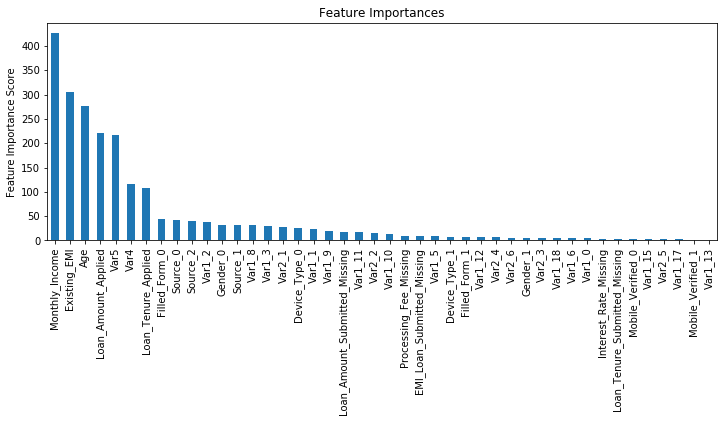

In [13]:
predictors = [x for x in train_df.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)

model_fit(xgb1, train_df, predictors,target)

#### Iteration 1: Tune max_depth and min_child_weight

In [16]:
param_test1 = {'max_depth':list(range(3,10,2)), 'min_child_weight':list(range(1,6,2)) }

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=140, 
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27),
                        param_grid = param_test1,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch1.fit(train_df[predictors],train_df[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [17]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.83764, std: 0.00875, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.83837, std: 0.00825, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.83716, std: 0.00818, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84016, std: 0.00680, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.83965, std: 0.00537, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.83935, std: 0.00548, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.83570, std: 0.00587, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.83448, std: 0.00726, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.83456, std: 0.00554, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.82851, std: 0.00651, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.82955, std: 0.00580, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.83158, std: 0.00677, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

#### Iteration 2 : Tune max_depth and min_child_weight

In [18]:
param_test2 = { 'max_depth':[4,5,6], 'min_child_weight':[4,5,6]}

gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                                  n_estimators=140,
                                                  max_depth=5,
                                                  min_child_weight=2,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27),
                        param_grid = param_test2,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch2.fit(train_df[predictors],train_df[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=2, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [19]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.84034, std: 0.00601, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.83921, std: 0.00658, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.84003, std: 0.00622, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.84071, std: 0.00553, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.83935, std: 0.00548, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.83871, std: 0.00492, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.83926, std: 0.00302, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.83717, std: 0.00483, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.83732, std: 0.00601, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 5, 'min_child_weight': 4},
 0.8407073731353547)

#### Iteration 3 : Tune gamma

In [21]:
param_test3 = { 'gamma':[i/10.0 for i in range(0,5)]}

gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=140,
                                                  max_depth=4,
                                                  min_child_weight=6,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test3,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)
gsearch3.fit(train_df[predictors],train_df[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [22]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.84003, std: 0.00622, params: {'gamma': 0.0},
  mean: 0.84017, std: 0.00594, params: {'gamma': 0.1},
  mean: 0.83963, std: 0.00624, params: {'gamma': 0.2},
  mean: 0.83974, std: 0.00692, params: {'gamma': 0.3},
  mean: 0.83996, std: 0.00568, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.8401672862430356)

#### Model 2

Model Report
Accuracy:  0.985394162262
AUC Score (Train):  0.883776745947


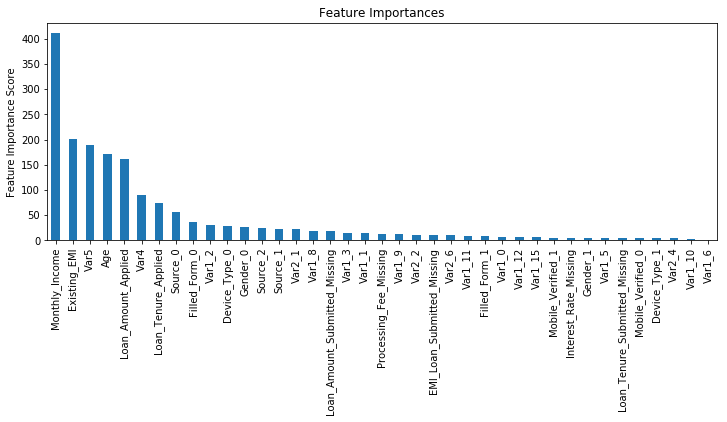

In [24]:
xgb2 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=4,
                     min_child_weight=6,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)

model_fit(xgb2, train_df, predictors,target)

#### Iteration 4 : Tune subsample and colsample_bytree

In [ ]:
param_test4 = { 'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]}

gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=177,
                                                  max_depth=4,
                                                  min_child_weight=6,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test4, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch4.fit(train_df[predictors],train_df[target])

In [ ]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

#### Iteration 5 :Tune Subsample and colsample_bytree

In [ ]:
param_test5 = { 'subsample':[i/100.0 for i in range(75,90,5)], 'colsample_bytree':[i/100.0 for i in range(75,90,5)]}

gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=177,
                                                  max_depth=4,
                                                  min_child_weight=6,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test5,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)
gsearch5.fit(train[predictors],train[target])

In [ ]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

#### Iteration 6 :  Tune regularization parameters

In [ ]:
param_test6 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=177,
                                                  max_depth=4,
                                                  min_child_weight=6,
                                                  gamma=0.1,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test6,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch6.fit(train[predictors],train[target])

In [ ]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

#### Iteration 7: Tune regularization paramters

In [ ]:
param_test7 = { 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}

gsearch7 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=177,
                                                  max_depth=4,
                                                  min_child_weight=6,
                                                  gamma=0.1,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test7, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch7.fit(train[predictors],train[target])

In [ ]:
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_